# # Project: Investigate a Dataset - [ Fuel economy]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul> 

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis:  Fuel economy 

>The dataset used to determine fuel economy estimates is derived from vehicle testing done at EPA's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers who submit their own test data to EPA. 


### Questions for Analysis:
>Are more unique models using alternative sources of fuel? By how much?

>How much have vehicle classes improved in fuel economy?

>What are the characteristics of SmartWay vehicles? Have they changed over time?

>What features are associated with better fuel economy?

>For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

>What is the vehicle that  has improved the most?

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [145]:
df08 = pd.read_csv('all_alpha_08.csv')
df08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


In [146]:
df18 = pd.read_csv('all_alpha_18.csv')
df18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386


In [147]:
df08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [148]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

## Data Cleaning
### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes

###  The Cleaning Process:
>First, I removed columns that are not necessary for my analysis 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG' at the 2008 dataset and 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'
from the 2018 dataset to improve database redability.

>I adjusted the data type of the columns. 

>I dropped the null values.

>I removed the duplicated rows.


In [149]:
df08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis= 1, inplace=True)

In [150]:
df08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [151]:
df18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis = 1, inplace=True)
df18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [152]:
df08.rename(columns={'Sales Area' : 'Cert Region' }, inplace=True)
df08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [153]:
df08.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace=True)
df08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [154]:
df18.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace=True)
df18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [155]:
(df08.columns == df18.columns).all()

True

In [156]:
df08.to_csv('data_08_v1.csv', index=False)
df18.to_csv('data_18_v1.csv', index=False)

# Filter, Drop Nulls, Duplicates

In [157]:
df08.shape

(2404, 14)

In [158]:
df18.shape

(1611, 14)

# Filter by Certification Region

In [159]:
df08 = df08.query('cert_region == "CA"')
df18 = df18.query('cert_region == "CA"')

In [160]:
df18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No


In [161]:
df08['cert_region'].value_counts()

CA    1084
Name: cert_region, dtype: int64

In [162]:
df08['cert_region'].nunique()

1

In [163]:
df18['cert_region'].unique()

array(['CA'], dtype=object)

In [164]:
df08.drop('cert_region', axis=1, inplace = True)
df18.drop('cert_region', axis=1, inplace = True)

In [165]:
df08.shape

(1084, 13)

In [166]:
df18.shape

(798, 13)

# Drop Rows with Missing Values

In [167]:
df08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [168]:
df18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [169]:
df08.dropna(inplace=True)
df18.dropna(inplace=True)

In [170]:
df08.shape

(1009, 13)

In [171]:
df18.shape

(797, 13)

In [172]:
df08.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [173]:
df08.duplicated().sum()

23

In [174]:
df18.duplicated().sum()

3

In [175]:
df08.drop_duplicates(inplace=True)
df18.drop_duplicates(inplace=True)

In [176]:
df18.duplicated().sum()

0

In [177]:
df08.to_csv('data_08_v2.csv', index=False)
df18.to_csv('data_18_v2.csv', index=False)

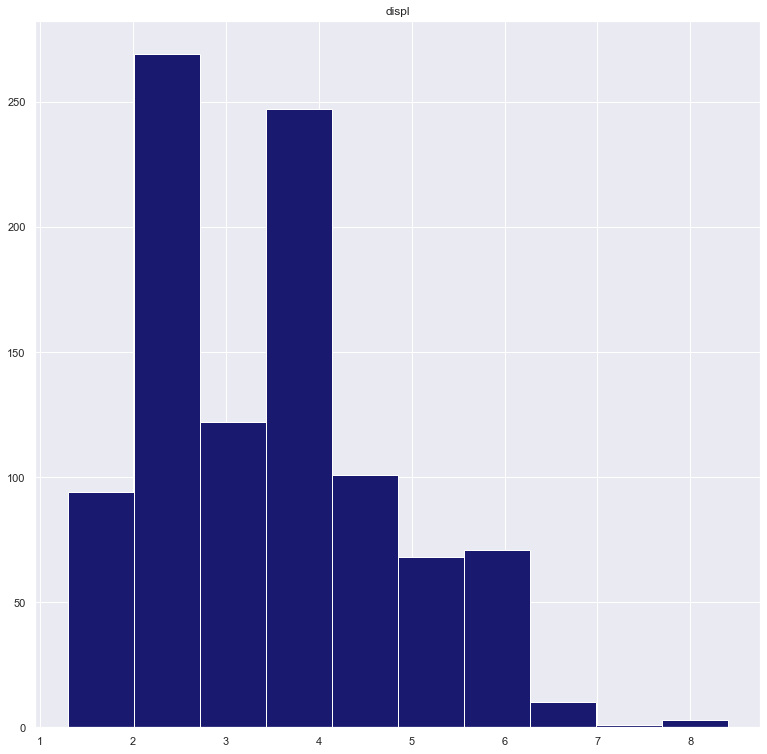

In [178]:
#having an overview of the 2008 dataset.
df08.hist(figsize=(13,13), color = 'midnightblue');

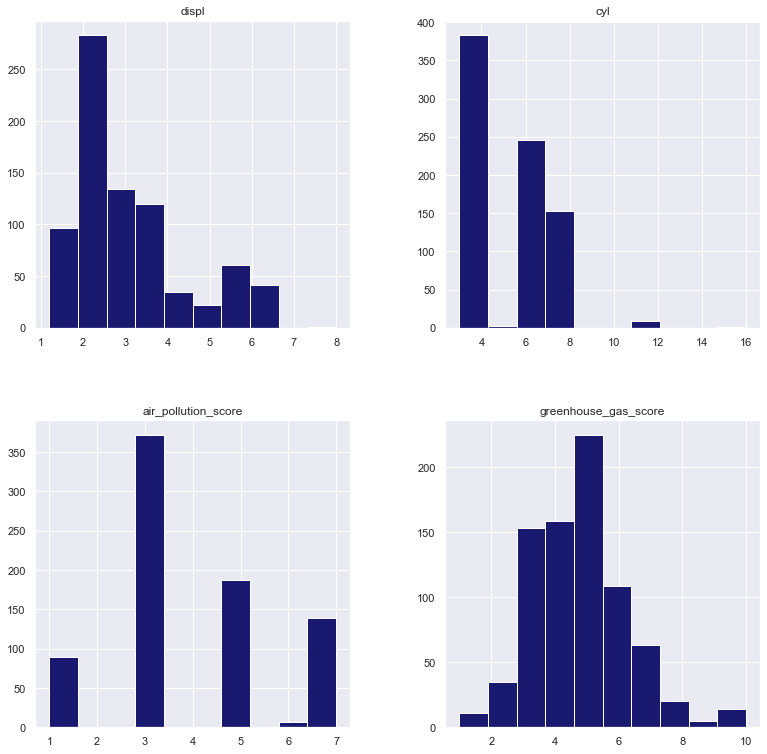

In [179]:
#having an overview of the 2018 dataset.
df18.hist(figsize=(13,13), color = 'midnightblue');

# Fixing cyl Data Type
### 2008: extract int from string
### 2018: convert float to int

In [180]:
df08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [181]:
#extracting the number inside the parentheses:
df08['cyl'] = df08['cyl'].str.extract('(\d+)').astype(int)

In [182]:
#checking..
df08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no


In [183]:
#checking..
df08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [184]:
#converting the data type:
df18['cyl'] = df18['cyl'].astype(int)

In [185]:
df08.to_csv('data_08_v3.csv', index=False)
df18.to_csv('data_18_v3.csv', index=False)

In [41]:
df08['air_pollution_score'] = df08['air_pollution_score'].astype(float)

ValueError: could not convert string to float: '6/4'

### We are facing a problem to convert the type of the data because:
>ValueError: could not convert string to float: '6/4'


## Checking for all the rows that contain ('/')

In [186]:
hb_08 = df08[df08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [187]:
hb_18 = df18[df18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [188]:
df1 = hb_08.copy()
df2 = hb_08.copy()

In [189]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


### Spliting the rows:

In [190]:
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [191]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [192]:
new_rows = df1.append(df2)

In [193]:
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [194]:
df08.drop(hb_08.index, inplace =True)

In [195]:
df08 = df08.append(new_rows, ignore_index=True)

In [196]:
df08[df08['fuel'].str.contains('/')]


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [197]:
df1 = hb_18.copy()
df2 = hb_18.copy()


In [198]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [199]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    df2[c] = df2[c].apply(lambda x: x.split('/')[1])

In [200]:
new_rows = df1.append(df2)

In [201]:
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5,13,17,14,1,No
1517,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5,13,17,15,2,No
1577,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7,70,72,71,10,Elite
1601,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,60,58,59,10,Elite


In [202]:
df18.drop(hb_18.index, inplace= True)

In [203]:
df18 = df18.append(new_rows, ignore_index=True)

In [204]:
df18[df18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [205]:
df08['air_pollution_score'] = df08['air_pollution_score'].astype(float)

In [206]:
df18['air_pollution_score'] = df18['air_pollution_score'].astype(float)

In [207]:
df08.to_csv('data_08_v4.csv', index=False)
df18.to_csv('data_18_v4.csv', index=False)

In [208]:
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df08[c] = df08[c].astype(float)
    df18[c] = df18[c].astype(float)

In [209]:
df08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    int32  
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    float64
 9   hwy_mpg               987 non-null    float64
 10  cmb_mpg               987 non-null    float64
 11  greenhouse_gas_score  987 non-null    object 
 12  smartway              987 non-null    object 
dtypes: float64(5), int32(1), object(7)
memory usage: 96.5+ KB


In [210]:
df08['greenhouse_gas_score'] = df08['greenhouse_gas_score'].astype('int64')

In [211]:
(df08.dtypes == df18.dtypes).all()

True

In [212]:
df08.to_csv('clean_08.csv', index=False)
df18.to_csv('clean_18.csv', index=False)

In [213]:
df08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [214]:
df18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No


# Q1: Are more unique models using alternative sources of fuel? By how much?

In [215]:
df08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [216]:
df08['fuel'].value_counts()

Gasoline    984
gas           1
CNG           1
ethanol       1
Name: fuel, dtype: int64

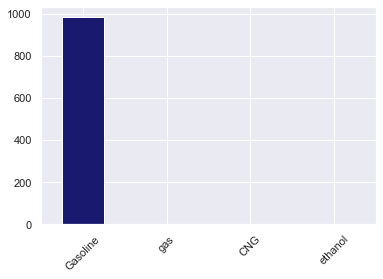

In [221]:
df08['fuel'].value_counts().plot(kind = 'bar', color = 'midnightblue')
plt.xticks(rotation = 45);

In [222]:
df18['fuel'].value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

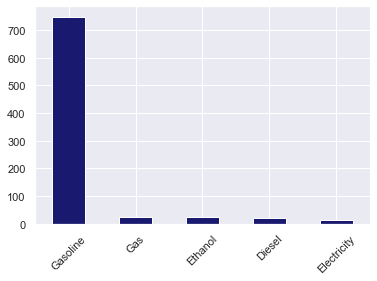

In [225]:
df18['fuel'].value_counts().plot(kind = 'bar', color = 'midnightblue')
plt.xticks(rotation = 45);

In [77]:
alt08 = df08.query('fuel in ["ethanol","CNG" ]')['model'].nunique()

In [78]:
alt08

2

In [79]:
alt18 = df18.query('fuel in ["Ethanol", "Electricity"]')['model'].nunique()

In [80]:
alt18

26

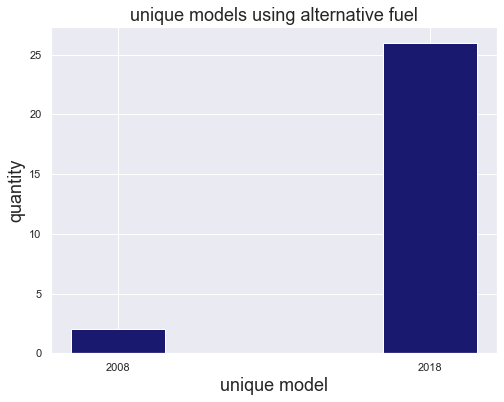

In [86]:
plt.figure(figsize=(8,6))
plt.bar(["2008", "2018"], [alt08, alt18], width = 0.3, color = 'midnightblue')
plt.title('unique models using alternative fuel',fontsize = 18 )
plt.xlabel('unique model', fontsize = 18)
plt.ylabel('quantity', fontsize = 18);

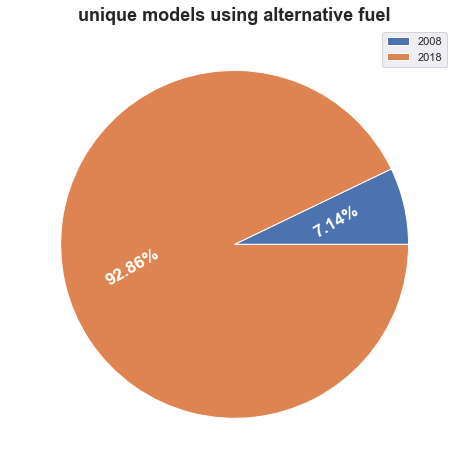

In [235]:
plt.figure(figsize=(10,8))
plt.pie([alt08, alt18], labels=["2008", "2018"], autopct= '%.2f%%',
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('unique models using alternative fuel', fontsize = 18, fontweight = 'bold')     
plt.legend()
plt.show()

In [226]:
tot08 = df08['model'].nunique()

In [227]:
tot18 = df18['model'].nunique()

In [228]:
tot08, tot18

(377, 357)

In [229]:
prop08 = alt08/tot08
prop18 = alt18/tot18

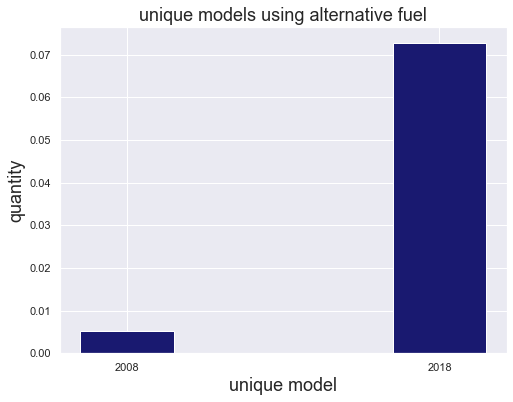

In [230]:
plt.figure(figsize=(8,6))
plt.bar(["2008", "2018"], [prop08,prop18] , width = 0.3, color = 'midnightblue')
plt.title('unique models using alternative fuel',fontsize = 18)
plt.xlabel('unique model', fontsize = 18)
plt.ylabel('quantity', fontsize = 18);

> We conclude that there is a huge increase in the number of new models using alternative fuel in 2018 compared with 2008.

# Q2: How much have vehicle classes improved in fuel economy?

In [92]:
veh_08 = df08.groupby('veh_class')['cmb_mpg'].mean()

In [93]:
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [94]:
veh_18 = df18.groupby('veh_class')['cmb_mpg'].mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [95]:
inc = veh_18 - veh_08

In [96]:
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

In [97]:
inc.dropna(inplace=True)

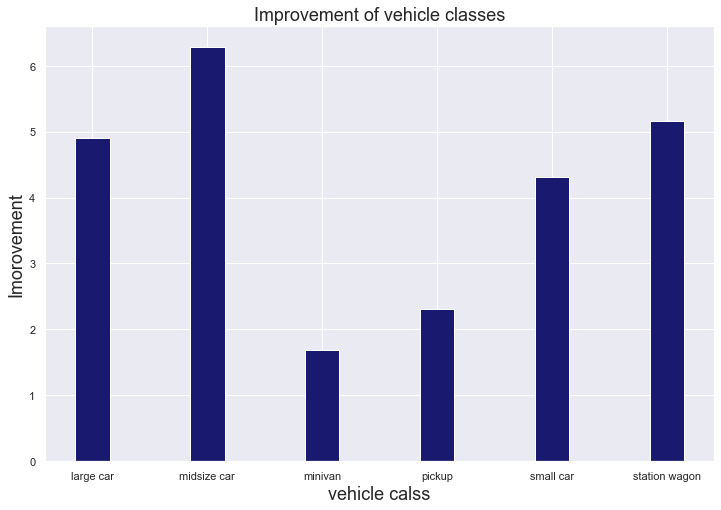

In [246]:
plt.figure(figsize=(12,8))
plt.bar(inc.index, inc, width = 0.3, color = 'midnightblue')
plt.title('Improvement of vehicle classes',fontsize = 18)
plt.xlabel('vehicle calss', fontsize = 18)
plt.ylabel('Imorovement', fontsize = 18)
plt.show();

>We can conclude that (midsize cars) have improved the most between 2008 and 2018 in relation to fuel economy, while (minvans) are the least class of vehicles to improve between 2008 and 2018.

# Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [100]:
df08.head(1)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [101]:
df08['smartway'].unique()

array(['no', 'yes'], dtype=object)

In [102]:
df18['smartway'].unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [103]:
smart_08 = df08.query('smartway == "yes"')

In [104]:
smart_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes
14,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,VOLVO V50,2.4,5,Man-5,2WD,Gasoline,station wagon,7.0,20.0,28.0,23.0,7,yes
976,VOLVO V50,2.5,5,Man-6,4WD,Gasoline,station wagon,7.0,17.0,25.0,20.0,6,yes
977,VOLVO V50,2.5,5,Auto-S5,4WD,Gasoline,station wagon,7.0,18.0,26.0,21.0,6,yes
978,VOLVO V50,2.5,5,Auto-S5,2WD,Gasoline,station wagon,7.0,19.0,27.0,22.0,6,yes


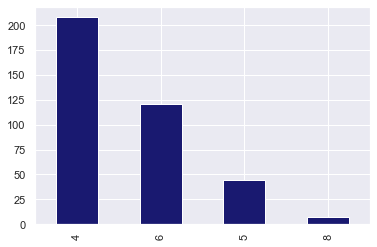

In [257]:
smart_08['cyl'].value_counts().plot(kind = 'bar', color = 'midnightblue');

In [258]:
y = smart_08.groupby('cyl')['greenhouse_gas_score'].mean()

In [259]:
y

cyl
4    7.274038
5    6.704545
6    6.280992
8    6.000000
Name: greenhouse_gas_score, dtype: float64

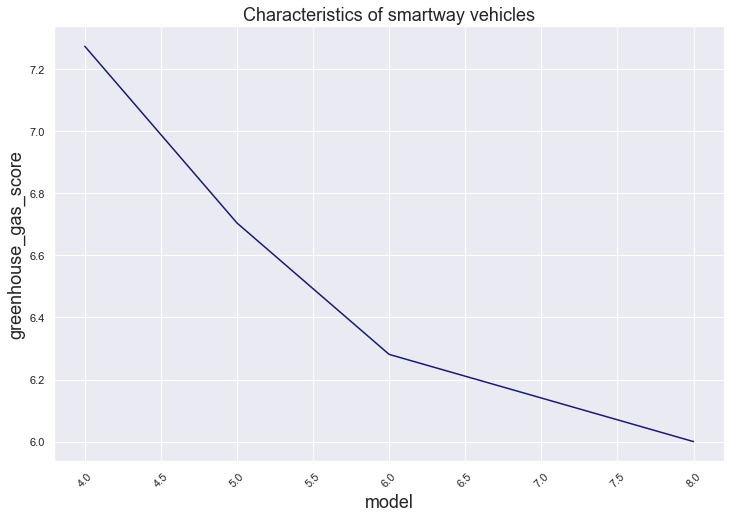

In [260]:
plt.figure(figsize=(12,8))
plt.plot(y,color = 'midnightblue')
plt.title('Characteristics of smartway vehicles',fontsize = 18)
plt.xlabel('model', fontsize = 18)
plt.ylabel('greenhouse_gas_score', fontsize = 18)
plt.xticks(rotation = 45)
plt.show();

In [105]:
smart_18 = df18.query('smartway in ["Yes", "Elite"]')

In [106]:
smart_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
15,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,small car,3.0,27.0,37.0,31.0,7,Yes
120,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,small SUV,3.0,27.0,33.0,30.0,7,Yes
168,CHEVROLET Cruze,1.4,4,Man-6,2WD,Gasoline,small car,6.0,27.0,40.0,32.0,7,Yes
169,CHEVROLET Cruze,1.4,4,SemiAuto-6,2WD,Gasoline,small car,6.0,29.0,40.0,33.0,8,Yes
170,CHEVROLET Cruze,1.6,4,Auto-9,2WD,Diesel,small car,3.0,31.0,47.0,37.0,7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,FORD Fusion Energi Plug-in Hybrid,2.0,4,CVT,2WD,Electricity,midsize car,7.0,102.0,91.0,97.0,10,Elite
826,MINI Cooper SE Countryman All4,1.5,3,SemiAuto-6,4WD,Electricity,midsize car,3.0,63.0,66.0,65.0,9,Yes
829,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7.0,70.0,72.0,71.0,10,Elite
830,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7.0,60.0,58.0,59.0,10,Elite


In [107]:
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [108]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


# Q4: What features are associated with better fuel economy?

In [261]:
high_cmb_08 = df08.query('cmb_mpg >= cmb_mpg.mean()')
low_cmb_08 = df08.query('cmb_mpg < cmb_mpg.mean()')
high_cmb_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes


In [110]:
low_cmb_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [111]:
pollution_score_high_cmb = high_cmb_08['air_pollution_score'].mean()
pollution_score_low_cmb = low_cmb_08['air_pollution_score'].mean()

Text(0, 0.5, 'air_pollution_score')

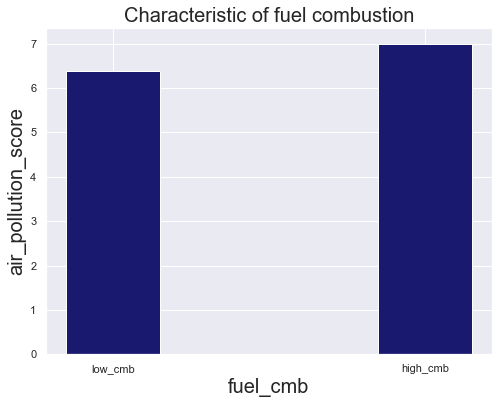

In [113]:
plt.figure(figsize=(8,6))
plt.bar(['low_cmb', 'high_cmb'], [pollution_score_low_cmb, pollution_score_high_cmb], width=0.3, color ='midnightblue')
plt.title('Characteristic of fuel combustion', fontsize = 20)
plt.xlabel('fuel_cmb', fontsize = 20)
plt.ylabel('air_pollution_score',fontsize = 20 )

In [114]:
high_cmb_18 = df18.query('cmb_mpg >= cmb_mpg.mean()')
low_cmb_18 = df18.query('cmb_mpg < cmb_mpg.mean()')
high_cmb_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No


In [115]:
low_cmb_18.head(1)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No


In [116]:
pollution_score_high_cmb = high_cmb_18['air_pollution_score'].mean()
pollution_score_low_cmb = low_cmb_18['air_pollution_score'].mean()

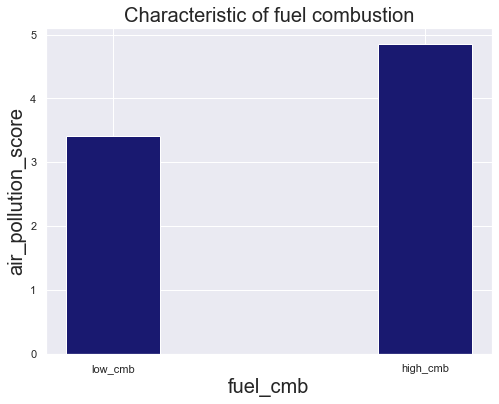

In [119]:
plt.figure(figsize=(8,6))
plt.bar(['low_cmb', 'high_cmb'], [pollution_score_low_cmb, pollution_score_high_cmb], width=0.3, color = 'midnightblue')
plt.title('Characteristic of fuel combustion', fontsize = 20)
plt.xlabel('fuel_cmb', fontsize = 20)
plt.ylabel('air_pollution_score',fontsize = 20 )
plt.show();

>We can conclude that there were no significant difference between being low_cmb or high_cmb in 2008 in relation to the air pollution score. The shift increased in 2018 as using a low_cmb results in a lower air_pollution_score.

# Merging Datasets

In [120]:
df08 = pd.read_csv('clean_08.csv')

In [121]:
df08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [122]:
df08.rename(columns= lambda x: x[:10]+ '_2008', inplace=True)
df08.head(1)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [123]:
df_combined = df08.merge(df18, left_on = 'model_2008', right_on = 'model', how = 'inner')

In [124]:
df_combined.columns

Index(['model_2008', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'veh_class_2008', 'air_pollut_2008', 'city_mpg_2008',
       'hwy_mpg_2008', 'cmb_mpg_2008', 'greenhouse_2008', 'smartway_2008',
       'model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [125]:
df_combined.to_csv('combined_dataset.csv', index=False)

## Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

In [126]:
model_mpg = df_combined.groupby('model')[['cmb_mpg_2008', 'cmb_mpg']].mean()

In [127]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


## 2. Create a new column, mpg_change, with the change in mpg

In [128]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [129]:
model_mpg

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000
...,...,...,...
TOYOTA Yaris,31.500000,32.500000,1.000000
VOLKSWAGEN Jetta,24.166667,30.000000,5.833333
VOLKSWAGEN Passat,21.250000,29.000000,7.750000


In [274]:
z = model_mpg.sort_values(ascending=False, by='mpg_change')

In [275]:
highest_model_mpg= z.head(15)

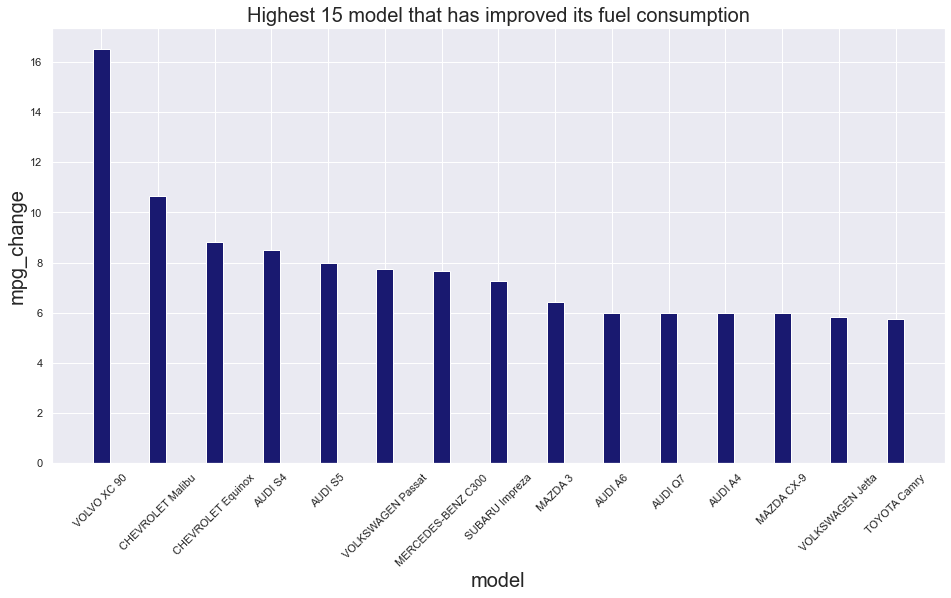

In [277]:
plt.figure(figsize=(16,8))
plt.bar(highest_model_mpg.index, highest_model_mpg['mpg_change'], width=0.3, color = 'midnightblue')
plt.title('Highest 15 model that has improved its fuel consumption', fontsize = 20)
plt.xlabel('model', fontsize = 20)
plt.ylabel('mpg_change',fontsize = 20 )
plt.xticks(rotation = 45)
plt.show();

> We can conclude that 'VOLVO XC 90' is the model that has improved the most in its fuel consumption.

## 3. Find the vehicle that improved the most

In [130]:
model_mpg['mpg_change'].max()

16.53333333333334

In [131]:
model_mpg[model_mpg['mpg_change'] == model_mpg['mpg_change'].max()]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


In [132]:
idx = model_mpg['mpg_change'].idxmax()

In [133]:
idx

'VOLVO XC 90'

In [134]:
model_mpg.loc[idx]

cmb_mpg_2008    15.666667
cmb_mpg         32.200000
mpg_change      16.533333
Name: VOLVO XC 90, dtype: float64

# Conclusions:

> We can conclude that there is a huge increase in the number of new models using alternative fuel in 2018 compared with 2008.

> We can conclude that (midsize cars) have improved the most between 2008 and 2018 in relation to fuel economy, while (minvans) are the least class of vehicles to improve between 2008 and 2018.

> We had an overview of the characteristics of SmartWay vehicles and how they have changed over time?

> We can conclude that there were no significant difference between being low_cmb or high_cmb in 2008 in relation to the air pollution score. The shift increased in 2018 as using a low_cmb results in a lower air_pollution_score.

> We can conclude that 'VOLVO XC 90' is the model that has improved the most by a considerable margin compared with other models.